# Задача 1

Рассчитать вероятность того, что обезьяна напечатает слово "распределение" на клавиатуре, состоящей из 40 клавиш.

# Задача 2

Бросаются два 8-гранных кубика. Нужно найти вероятность того, что сумма очков делится на 3.

In [1]:
from itertools import product

dice = list(range(1, 9))
combinations = list(product(dice, dice))
res = []
for comb in combinations:
    if sum(comb) % 3 == 0:
        res.append(comb)
print(len(res) / len(combinations))

0.34375


# Задача 3

Одновременно подбрасывают три кубика и записывают сумму их очков. Если результат превышает 15, то в таблицу записывают 1, а если нет, то 0. Затем значения в таблице суммируют. Какое матожидание этой величины, если проводят серию из 20 бросков?

In [3]:
dice = list(range(1, 7))

combinations = list(product(dice, dice, dice))
need_combinations = []
for comb in combinations:
    if sum(comb) > 15:
        need_combinations.append(comb)
len(need_combinations) / len(combinations)

0.046296296296296294

# Задача 4

Диаметр подшипников, изготовленных на заводе, представляет собой случайную величину, распределенную нормально с математическим ожиданием 1,5 см и средним квадратическим отклонением 0,04 см.

Найти вероятность того, что размер наугад взятого подшипника колеблется от 1,4 до 1,6 см.

Сначала решите при помощи правила 3 сигм, а затем получите точный ответ.

In [6]:
import scipy.stats

def normal_integral(x):
    return scipy.stats.norm.cdf(x) - 0.5

In [8]:
a = (1.4 - 1.5) / 0.04
b = (1.6 - 1.5) / 0.04

normal_integral(b) - normal_integral(a)

0.9875806693484479

# Задача 5

Среди определенной группы людей вероятность заболеть коронавирусом 0.1. Тест позволяет выявить болезнь с вероятностью 0.98 на больных людях, но также он дает ложно-положительный результат с вероятностью 0.01. Найдите вероятность того, что человек, сдавший тест, действительно болен.

# Задача 6

Используя условия прошлой задачи найдите вероятность того, что класс из 30 человек закроют на карантин. Класс закрывают на карантин, если тест дает положительный результат хотя бы на 5 школьниках.

In [10]:
from scipy.special import binom

def p_k(p, q, n, k):
    return binom(n, k) * (p ** k) * (q ** (n-k))

p = 0.107
q = 1 - p
n = 30

s = 0
for i in range(0, 5):
    s += p_k(p, q, n, i)

1 - s

0.21274811875038357

# Задача 7

Используя датасет о чаевых рассчитать основные статистические показатели, построить гистограмму и boxplot:

- по всей выборке
- только по курящим мужчинам
- только по некурящим женщинам, которые ходят в пятницу на ужин

In [11]:
import seaborn as sns

tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

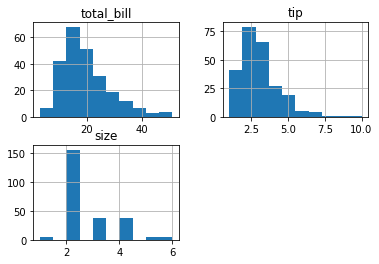

In [13]:
tips_df.hist()

In [22]:
smoking_man = tips_df[(tips_df['sex'] == 'Male') & (tips_df['smoker'] == 'Yes')]
smoking_man.head()

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2


In [17]:
smoking_man.describe()

,total_bill,tip,size
count,60.000000,60.000000,60.00000
mean,22.284500,3.051167,2.50000
std,9.911845,1.500120,0.89253
min,7.250000,1.000000,1.00000
25%,15.272500,2.000000,2.00000
50%,20.390000,3.000000,2.00000
75%,28.572500,3.820000,3.00000
max,50.810000,10.000000,5.00000


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>],
       [<AxesSubplot:title={'center':'size'}>, <AxesSubplot:>]],
      dtype=object)

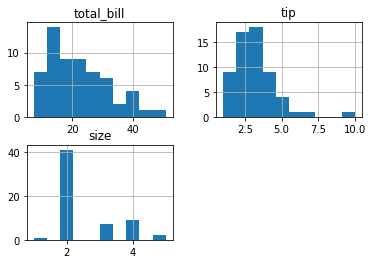

In [18]:
smoking_man.hist()

In [19]:
female = tips_df[(tips_df['sex'] == 'Female') & (tips_df['smoker'] == 'No') & (tips_df['time'] == 'Dinner')]
female.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [24]:
female.describe()

,total_bill,tip,size
count,29.000000,29.000000,29.000000
mean,20.004138,3.044138,2.655172
std,7.298371,1.117885,0.936401
min,7.250000,1.000000,1.000000
25%,15.770000,2.450000,2.000000
50%,17.310000,3.000000,2.000000
75%,24.590000,3.610000,3.000000
max,35.830000,5.200000,5.000000


<AxesSubplot:>

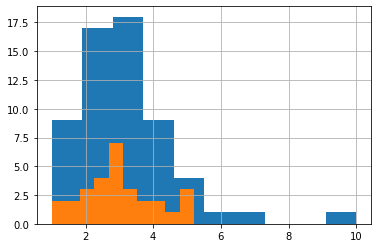

In [28]:
smoking_man['tip'].hist()
female['tip'].hist()

<AxesSubplot:>

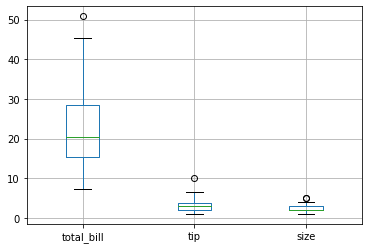

In [33]:
smoking_man.boxplot()

<AxesSubplot:>

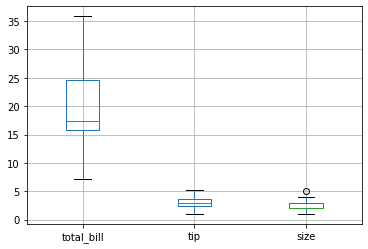

In [34]:
female.boxplot()